In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, make_scorer, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, Lasso

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve,GridSearchCV

from sklearn.ensemble import RandomForestClassifier

import warnings from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Data Importing and Tidying

In [17]:
#Imports the dataset for CSV format
data = pd.read_csv('oscar_movies_ML.csv')

In [18]:
#Function to drop columns that have been turned into dummy columns, or replaced by other values

#LOOK HERE TO MAKE SURE 
def dropfeatures(data):
    return data.drop(columns = ['Unnamed: 0', 'title'], inplace=True)

#Big function to call dataframe transformations, especially categorical
def transform_features(data):
    dropfeatures(data)
    
    return data

#Drop rows with at least one missing value
data.dropna(inplace=True)

#Resets index
data.reset_index(drop=True, inplace=True)

# Training the Model. GridSearch is used and Optimizing on Precision and Accuracy

In [19]:
#Below, we can transform the data
data = transform_features(data)

In [20]:
from sklearn.model_selection import train_test_split

#Defines the Feature Array and Target Array
X = data.drop(['won_oscar'], axis=1)
y = data['won_oscar']

# splitting into train and test
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=1)

In [21]:
#Construct Pipeline with Parameters found via GridSearch on precision

pipe = make_pipeline(
                   PolynomialFeatures(include_bias = False),
                    StandardScaler(),
                   LogisticRegression())

params = {'polynomialfeatures__degree': [1,2,3],
         'logisticregression__penalty': ['l1', 'l2'],
         'logisticregression__C': np.logspace(-4,4, 10)}

gridresult_pre = GridSearchCV(pipe, params, cv = 5, scoring = 'precision').fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: Un

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: Un

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: Un

KeyboardInterrupt: 

In [ ]:
#Construct Pipeline with Parameters found via GridSearch on accuracy

pipe =make_pipeline(
                   PolynomialFeatures(include_bias = False),
                    StandardScaler(),
                   LogisticRegression())

params = {'polynomialfeatures__degree': [1,2,3],
         'logisticregression__penalty': ['l1', 'l2'],
         'logisticregression__C': np.logspace(-4,4, 10)}

gridresult_acc = GridSearchCV(pipe, params, cv = 5, scoring = 'accuracy').fit(X_train, y_train)

In [68]:
#Result of the GridSearch

#precision
gridresult_pre.best_estimator_

#accuracy
gridresult_acc.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=166.81005372000558, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

# Compute Performance Metrics from Pipeline found via GridSearch

In [22]:
#Showing the precision of the optimal model
pipe_3l1_best_pre = make_pipeline(PolynomialFeatures(3, include_bias=False, interaction_only=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1', C=166.81005372000558))

pipe_best_pre = pipe_3l1_best_pre.fit(X_train, y_train)

y_pred_bes_pre = pipe_3l1_best_pre.predict(X_test)

print(precision_score(y_true=y_test, y_pred=y_pred_best_pre))

KeyboardInterrupt: 

In [ ]:
pipe_1l1_best_acc = make_pipeline(PolynomialFeatures(1, include_bias=False, interaction_only=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1', C=0.0001))

pipe_best_acc = pipe_1l1_best_acc.fit(X_train, y_train)

y_pred_best_acc = pipe_1l1_best_acc.predict(X_test)

print(precision_score(y_true=y_test, y_pred=y_pred_best_acc))

## Print Confusion Matrix Results

In [11]:
#Accuracy Array
conmat = confusion_matrix(y_true=y_test, y_pred=y_pred_best_acc)

NameError: name 'y_pred_best' is not defined

In [ ]:
#Precision Array
conmat = confusion_matrix(y_true=y_test, y_pred=y_pred_best_pre)

## Prints Confusion Matrix Figure

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conmat.shape[0]):
    for j in range(conmat.shape[1]):
        ax.text(x=j, y=i,
            s=conmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Manually Examines Different Pipelines

In [ ]:
#1st polym and no penalty
pipe_1none = make_pipeline(PolynomialFeatures(1, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))

#2nd polym and no penalty
pipe_2none = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))
                        
#3nd polym and no penalty
pipe_3none = make_pipeline(PolynomialFeatures(3, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))

#4nd polym and no penalty, with bias
pipe_4none = make_pipeline(PolynomialFeatures(4, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))

#1st polym and no penalty, with bias
pipe_1noneb = make_pipeline(PolynomialFeatures(1, include_bias=True), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))

#2nd polym and no penalty, with bias
pipe_2noneb = make_pipeline(PolynomialFeatures(2, include_bias=True), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))
                        
#3nd polym and no penalty, with bias
pipe_3noneb = make_pipeline(PolynomialFeatures(3, include_bias=True), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))

#4nd polym and no penalty, with bias
pipe_4noneb = make_pipeline(PolynomialFeatures(4, include_bias=True), 
                        StandardScaler(),
                        LogisticRegression(C=3000000))





#1st polym and L2 penalty
pipe_1l2 = make_pipeline(PolynomialFeatures(1, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l2', C=0.1))

#2nd polym and L2 penalty
pipe_2l2 = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l2', C=0.1))
                        
#3nd polym and L2 penalty
pipe_3l2 = make_pipeline(PolynomialFeatures(3, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l2', C=0.1))

#4nd polym and L2 penalty
pipe_3l2 = make_pipeline(PolynomialFeatures(4, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l2', C=0.1))





#1st polym and L1 penalty
pipe_1l1 = make_pipeline(PolynomialFeatures(1, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1', C=0.1))

#2nd polym and L1 penalty
pipe_2l1 = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1', C=0.1))
                        
#3nd polym and L1 penalty
pipe_3l1 = make_pipeline(PolynomialFeatures(3, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1', C=0.1))

#4nd polym and L2 penalty
pipe_4l1 = make_pipeline(PolynomialFeatures(4, include_bias=False), 
                        StandardScaler(),
                        LogisticRegression(penalty='l1'))



# Print Precision Score from Pipe of 3$^{rd}$ Degree with L1 Penalty and 1$^{st}$ Degree with L1 Penalty

In [57]:
printprecision(pipe_3l1_best_pre)

printprecision(pipe_1l1_best_acc)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AttributeError: 'Pipeline' object has no attribute 'precision_score'

In [16]:
print(precision_score(y_true=y_test, y_pred=y_train))

ValueError: Found input variables with inconsistent numbers of samples: [83, 192]

# Prints Accuracy Score from ***Manually Examines Different Pipelines***

In [23]:
#Defines function to print accuracy score
def printscore(pipe_lineX):
    pipe_lr = pipe_lineX.fit(X_train, y_train)
    
    
    #IS THE PREDICTION OF ACCURACY ALL WRONG HERE?
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(pipe_lr.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(pipe_lr.score(X_test, y_test)))
    return

In [14]:
def printprecision(pipe_lineX):
    pipe_lr = pipe_lineX.fit(X_train, y_train)
    
    #IS THE PREDICTION OF ACCURACY ALL WRONG HERE?
    print('Precision of Logistic regression classifier on training set: {:.2f}'
     .format(pipe_lr.precision_score(y_true=y_test, y_pred=y_train)))
    return

In [14]:
printscore(pipe_1none)
printscore(pipe_2none)
printscore(pipe_3none)

/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.61


/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.66


/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.60


In [16]:
#printscore(pipe_1noneb)
#printscore(pipe_2noneb)
#printscore(pipe_3noneb)

/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.61
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.66


/Users/Johannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.60


In [ ]:
printscore(pipe_1l2)
printscore(pipe_2l2)
printscore(pipe_3l2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.75


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.64


In [ ]:
printscore(pipe_1l1)
printscore(pipe_2l1)
printscore(pipe_3l1)

# Prints Classification Report from GridSearch Parameters

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.96      0.89        67
        True       0.50      0.19      0.27        16

   micro avg       0.81      0.81      0.81        83
   macro avg       0.67      0.57      0.58        83
weighted avg       0.77      0.81      0.77        83



In [26]:
#It is a this point that we can searly clear our training model suffering from 'overfitting' 
#This is likely due to an imbalance between FalsePositives and FalseNegatives in predicting a boolean target.

#Printing the test prediction distributions, we can also see that about 6/7 prediction will predict NO win
print(y_test.value_counts())
print(y_train.value_counts())

False    67
True     16
Name: won_oscar, dtype: int64
False    146
True      46
Name: won_oscar, dtype: int64


In [30]:
#To check for this, we will plot a confusion matrix

pipe_lr = pipe_3l1.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

conmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(conmat)
#print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_train))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[64  3]
 [13  3]]


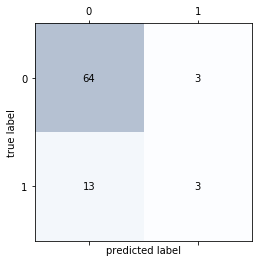

In [37]:
#Pipeline 3l1
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conmat.shape[0]):
    for j in range(conmat.shape[1]):
        ax.text(x=j, y=i,
            s=conmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()